In [ ]:
import numpy as np
import pandas as pd
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Cse422/loan-train.csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
df.shape

(614, 13)

In [ ]:
df.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df = df.drop(['Loan_ID'], axis = 1)

In [ ]:
df.isnull()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)      #categorical
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True) #numerical 

In [ ]:
df = pd.get_dummies(df) #One HotEncoding

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

In [ ]:
df.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
5,5417,4196.0,267.000000,360.0,1.0,1,1,0,0,1,0,1,1,0,0,1,1
6,2333,1516.0,95.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
7,3036,2504.0,158.000000,360.0,0.0,1,1,0,0,0,1,1,0,0,1,0,0
8,4006,1526.0,168.000000,360.0,1.0,1,1,0,0,1,0,1,0,0,0,1,1
9,12841,10968.0,349.000000,360.0,1.0,1,1,0,1,0,0,1,0,0,1,0,0


In [ ]:
Q1 = df.quantile(0.25)  #for  removing quantile value 
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


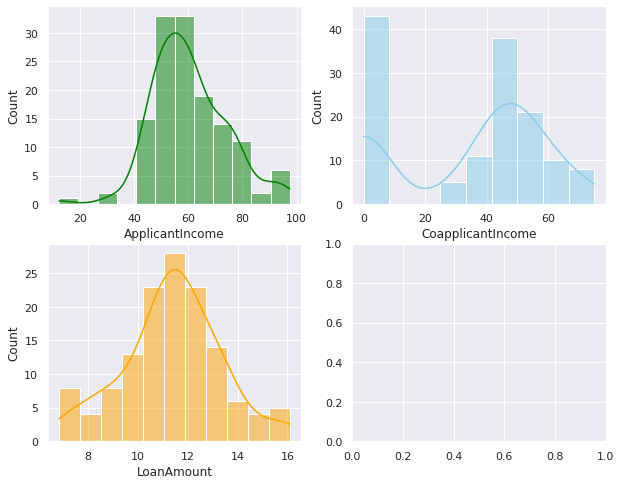

In [ ]:
# Square Root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

In [ ]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [ ]:
y.value_counts()

1    112
0     24
Name: Loan_Status, dtype: int64

In [ ]:
X, y = SMOTE().fit_resample(X, y)

In [ ]:
y.value_counts()

1    112
0    112
Name: Loan_Status, dtype: int64

In [ ]:
X = MinMaxScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) #spliting the dataset train = 80% test = 20%

# Models 
Gaussian NB

In [ ]:
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)

y_pred = NBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc*100))

              precision    recall  f1-score   support

           0       0.66      0.83      0.73        23
           1       0.75      0.55      0.63        22

    accuracy                           0.69        45
   macro avg       0.70      0.69      0.68        45
weighted avg       0.70      0.69      0.68        45

Gaussian Naive Bayes accuracy: 68.89%


In [ ]:
print("Training accuracy of the model is {:.2f}".format(NBclassifier.score(X_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(NBclassifier.score(X_test, y_test)))

Training accuracy of the model is 0.68
Testing accuracy of the model is 0.69


In [ ]:
predictions = NBclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
mat1=confusion_matrix(predictions, y_test)
print(mat1)

[[19 10]
 [ 4 12]]


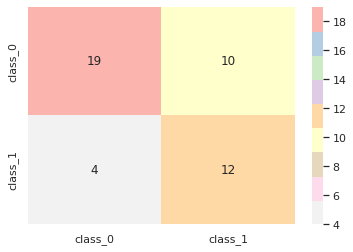

In [ ]:
from seaborn import heatmap
heatmap(mat1 , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)

Support Vector Machine (SVM)

In [ ]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81        23
           1       0.77      0.91      0.83        22

    accuracy                           0.82        45
   macro avg       0.83      0.82      0.82        45
weighted avg       0.83      0.82      0.82        45

SVC accuracy: 82.22%


In [ ]:
predictions = SVCclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
mat2=confusion_matrix(predictions, y_test)
print(mat2)

[[17  2]
 [ 6 20]]


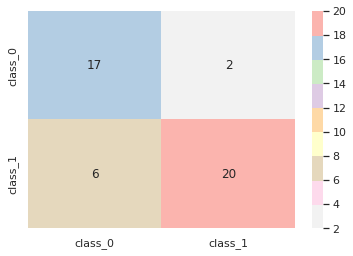

In [ ]:
from seaborn import heatmap
heatmap(mat2 , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)

Random Forest

In [ ]:
RFclassifier = RandomForestClassifier(n_estimators = 1000)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)

print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.89      0.77      0.83        22

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.85      0.84      0.84        45

Random Forest Accuracy:  84.44%


In [ ]:
predictions = RFclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[21  5]
 [ 2 17]]


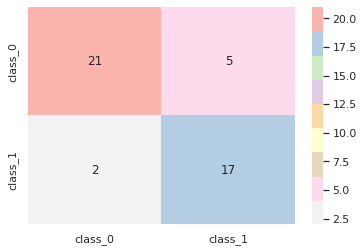

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)

In [ ]:
compare = pd.DataFrame({'Model': ['SVM',  
                                  'Gaussian NB',  
                                  'Random Forest', ], 
                        'Accuracy': [SVCAcc*100, 
                                     NBAcc*100, 
                                     RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Random Forest,84.444444
0,SVM,82.222222
1,Gaussian NB,68.888889
